In [56]:
import pandas as pd
from glob import glob
import os.path
from matplotlib import pyplot

In [60]:
def load_acc_info(acc, src='swine'):
    d = {}
    d['acc'] = acc
    d['source'] = src

    all_gather = pd.read_csv(f'outputs.swine-x-all/{acc}.gather.csv')
    all_gathertax = pd.read_csv(f'outputs.swine-x-all/{acc}.gathertax.summarized.csv')
    all_gathertax_species = all_gathertax[all_gathertax['rank'] == 'species']
    d['all_num_genomes'] = len(all_gather)
    d['all_num_species'] = len(all_gathertax_species)

    try:
        reps_gather = pd.read_csv(f'outputs.swine-x-reps/{acc}.gather.csv')
        reps_gathertax = pd.read_csv(f'outputs.swine-x-reps/{acc}.gathertax.summarized.csv')
        reps_gathertax_species = reps_gathertax[reps_gathertax['rank'] == 'species']
        d['reps_num_genomes'] = len(reps_gather)
        d['reps_num_species'] = len(reps_gathertax_species)
    except:
        d['reps_num_genomes'] = -1
        d['reps_num_species'] = -1

    weighted_found = int(all_gather['sum_weighted_found'].tail(1))
    weighted_total = int(all_gather['total_weighted_hashes'].tail(1))

    d['p_weighted_found'] = 100*weighted_found / weighted_total
    
    try:
        host_df = pd.read_csv(f'outputs.swine-x-all/{acc}.x.host.search.csv')
        p_host = float(host_df['similarity'].tail(1)) * 100
    except pd.errors.EmptyDataError:
        p_host = 0
    d['p_host'] = p_host
    
    return d

In [61]:
acclist = glob('outputs.swine-x-all/*.gather.csv')
acclist = [ os.path.basename(x) for x in acclist ]
acclist = [ x.split('.')[0] for x in acclist ]

print(len(acclist))

463


In [62]:
acc_info_list = [ load_acc_info(acc) for acc in acclist ]

gather_info_df = pd.DataFrame(acc_info_list)

In [63]:
gather_info_df

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,SRR11125272,swine,211,157,-1,-1,76.796542,0.000000
1,SRR17241638,swine,1684,1131,-1,-1,68.631143,0.000000
2,ERR1135640,swine,54,51,-1,-1,39.358974,0.000000
3,SRR8960962,swine,993,689,-1,-1,73.834017,0.000000
4,ERR3211938,swine,1167,826,-1,-1,59.492075,0.000000
...,...,...,...,...,...,...,...,...
458,SRR21977572,swine,382,297,-1,-1,42.639287,0.000000
459,SRR11945343,swine,2,3,-1,-1,5.637493,0.000000
460,SRR15410075,swine,27,24,-1,-1,7.369395,13.728577
461,ERR3211888,swine,1062,759,-1,-1,57.343014,0.000000


{'bodies': [<matplotlib.collections.PolyCollection at 0x169822910>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1698227c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x169822f70>,
 'cbars': <matplotlib.collections.LineCollection at 0x169802370>}

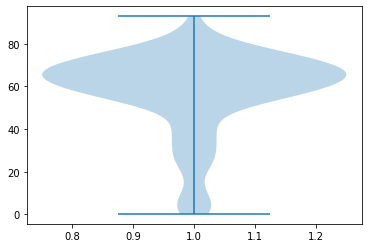

In [64]:
pyplot.violinplot(gather_info_df['p_weighted_found'])

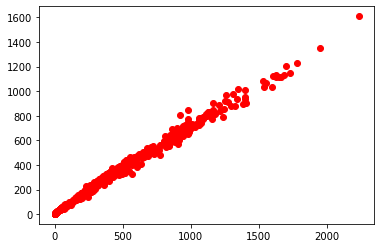

In [65]:
pyplot.plot(gather_info_df['all_num_genomes'], gather_info_df['all_num_species'], 'ro')

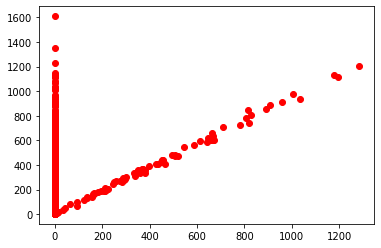

In [66]:
pyplot.plot(gather_info_df['reps_num_species'], gather_info_df['all_num_species'], 'ro')

{'bodies': [<matplotlib.collections.PolyCollection at 0x16974f550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x16974f4c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x16974fa90>,
 'cbars': <matplotlib.collections.LineCollection at 0x16974fe50>}

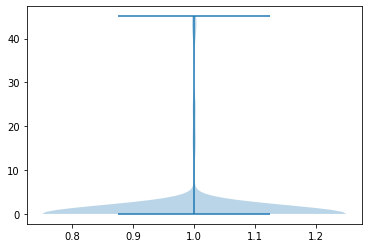

In [67]:
pyplot.violinplot(gather_info_df['p_host'])

In [71]:
gather_info_df.sort_values(by='p_host')

,acc,source,all_num_genomes,all_num_species,reps_num_genomes,reps_num_species,p_weighted_found,p_host
0,SRR11125272,swine,211,157,-1,-1,76.796542,0.000000
312,SRR17211177,swine,264,180,-1,-1,85.742387,0.000000
311,SRR8960123,swine,357,308,-1,-1,62.930050,0.000000
310,SRR11124818,swine,430,344,-1,-1,62.329420,0.000000
309,SRR11125642,swine,241,195,-1,-1,66.790533,0.000000
...,...,...,...,...,...,...,...,...
140,SRR19906188,swine,375,328,-1,-1,29.738937,43.566657
64,SRR19906193,swine,312,271,-1,-1,31.498151,43.755798
189,SRR19906163,swine,245,218,-1,-1,22.541149,44.866341
88,SRR19906156,swine,159,138,135,136,26.933139,44.973515


In [72]:
len(gather_info_df)

463

In [73]:
len(gather_info_df[gather_info_df['p_weighted_found'] < 50])

92

In [74]:
92 / 463 * 8000


1589.63282937365